# Case Study - Summer Olympics


## 1. Loading Olympic edition DataFrame
In this chapter, you'll be using [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: `'Edition'`, `'Bronze'`, `'Gold'`, `'Silver'`, `'Grand Total'`, `'City'`, and `'Country'`.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: `'Edition'`, `'Grand Total'`, `City`, and `Country`.

In [24]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep="\t")

# Extract the relevant columns: editions
editions = editions[["Edition", "Grand Total", "City", "Country"]]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

Great work! Next, you'll prepare a DataFrame of IOC codes.



## 2. Loading IOC codes DataFrame
Your task here is to prepare a DataFrame `ioc_codes` from a comma-separated values (CSV) file.

Initially, `ioc_codes` has 200 rows (one for each country) and 3 columns: `'Country'`, `'NOC'`, & `'ISO code'`.

For the analysis that follows, you want to keep only the useful columns from `ioc_codes`: `'Country'` and `'NOC'` (the column `'NOC'` contains three-letter codes representing each country).

In [6]:
# Create the file path: file_path
file_path = 'data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[["Country", "NOC"]]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


## 3. Building medals DataFrame
Here, you'll start with the DataFrame editions from the previous exercise.

You have a sequence of files `summer_1896.csv`, `summer_1900.csv`, ..., `summer_2008.csv`, one for each Olympic edition (year).

You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using `pd.concat()`.

In [29]:
# Loading in the main dataframe
medals = pd.read_csv("data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv", sep="\t", header = 4)

# Printing tail of the main df
medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [21]:
# Extracting unique list of years
years = medals.Edition.drop_duplicates()

# Slicing the main dataframe based on edition years and saving it as separate csv files to load in later
for year in years:
    file_path = "data/Summer Olympic medals/summer_{:d}.csv".format(year)
    df = medals[medals.Edition == year]
    df.to_csv(file_path, index = False)

In [26]:
# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'data/Summer Olympic medals/summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][["Athlete", "NOC", "Medal"]]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year

In [27]:
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

              Athlete  NOC   Medal  Edition
0       HAJOS, Alfred  HUN    Gold     1896
1    HERSCHMANN, Otto  AUT  Silver     1896
2   DRIVAS, Dimitrios  GRE  Bronze     1896
3  MALOKINIS, Ioannis  GRE    Gold     1896
4  CHASAPIS, Spiridon  GRE  Silver     1896
                    Athlete  NOC   Medal  Edition
29211        ENGLICH, Mirko  GER  Silver     2008
29212  MIZGAITIS, Mindaugas  LTU  Bronze     2008
29213       PATRIKEEV, Yuri  ARM  Bronze     2008
29214         LOPEZ, Mijain  CUB    Gold     2008
29215        BAROEV, Khasan  RUS  Silver     2008


Fantastic! You're now ready to begin analyzing the medal data.



## 4. Counting medals by country/edition in a pivot table
Here, you'll start with the concatenated DataFrame medals from the previous exercise.

You can construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country `NOC` codes as columns. If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in Manipulating DataFrames with pandas.

In [34]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index = "Edition", values = "Athlete", columns="NOC", aggfunc="count")

# Print the first & last 5 rows of medal_counts
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
medal_counts.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


Great work! As you can see, the pivot table DataFrame has mostly `NaN` entries (because most countries do not win any medals in a given Olympic edition).



## 5. Computing fraction of medals per Olympic edition
In this exercise, you'll start with the DataFrames editions, `medals`, & `medal_counts` from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame `medal_counts` can be divided row-wise by the total number of medals awarded each edition; the method `.divide()` performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

In [48]:
# Set Index of editions: totals
totals = editions.set_index("Edition")

# Reassign totals['Grand Total']: totals
totals = totals["Grand Total"]

In [49]:
# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis = "rows")

# Print first & last 5 rows of fractions
print(fractions.head())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

In [50]:
print(fractions.tail())

NOC          AFG  AHO       ALG  ANZ       ARG       ARM       AUS       AUT  \
Edition                                                                        
1992         NaN  NaN  0.001173  NaN  0.001173       NaN  0.033431  0.003519   
1996         NaN  NaN  0.001614  NaN  0.010758  0.001076  0.071006  0.001614   
2000         NaN  NaN  0.002481  NaN  0.009926  0.000496  0.090819  0.001985   
2004         NaN  NaN       NaN  NaN  0.023524       NaN  0.078579  0.004004   
2008     0.00049  NaN  0.000979  NaN  0.024976  0.002938  0.072968  0.001469   

NOC           AZE       BAH ...   URS       URU       USA       UZB       VEN  \
Edition                     ...                                                 
1992          NaN  0.000587 ...   NaN       NaN  0.131378       NaN       NaN   
1996     0.000538  0.002690 ...   NaN       NaN  0.139860  0.001076       NaN   
2000     0.001489  0.002978 ...   NaN  0.000496  0.123077  0.001985       NaN   
2004     0.002503  0.001001 ...   

## 6. Computing percentage change in fraction of medals won
Here, you'll start with the DataFrames `editions`, `medals`, `medal_counts`, & `fractions` from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#expanding-windows) has additional information.

In [57]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

print(mean_fractions.tail())

NOC          AFG       AHO       ALG       ANZ       ARG       ARM       AUS  \
Edition                                                                        
1992         NaN  0.000647  0.001272  0.017466  0.009095       NaN  0.022551   
1996         NaN  0.000647  0.001386  0.017466  0.009214  0.001076  0.024974   
2000         NaN  0.000647  0.001660  0.017466  0.009261  0.000786  0.028109   
2004         NaN  0.000647  0.001660  0.017466  0.010152  0.000786  0.030403   
2008     0.00049  0.000647  0.001524  0.017466  0.011024  0.001503  0.032254   

NOC           AUT       AZE       BAH    ...          URS       URU       USA  \
Edition                                  ...                                    
1992     0.008682       NaN  0.001609    ...     0.197122  0.013069  0.179834   
1996     0.008345  0.000538  0.001879    ...     0.197122  0.013069  0.178017   
2000     0.008056  0.001013  0.002099    ...     0.197122  0.011497  0.175629   
2004     0.007880  0.001510  0.001

In [58]:
# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

print(fractions_change.tail())

NOC      AFG  AHO        ALG  ANZ       ARG        ARM        AUS       AUT  \
Edition                                                                       
1992     NaN  0.0  -7.214076  0.0 -6.767308        NaN   2.754114 -3.034840   
1996     NaN  0.0   8.959211  0.0  1.306696        NaN  10.743275 -3.876773   
2000     NaN  0.0  19.762488  0.0  0.515190 -26.935484  12.554986 -3.464221   
2004     NaN  0.0   0.000000  0.0  9.625365   0.000000   8.161162 -2.186922   
2008     NaN  0.0  -8.197807  0.0  8.588555  91.266408   6.086870 -3.389836   

NOC            AZE        BAH ...   URS        URU       USA        UZB  \
Edition                       ...                                         
1992           NaN -24.111659 ...   0.0   0.000000 -1.329330        NaN   
1996           NaN  16.793717 ...   0.0   0.000000 -1.010378        NaN   
2000     88.387097  11.693273 ...   0.0 -12.025323 -1.341842  42.258065   
2004     48.982144  -8.717582 ...   0.0   0.000000 -1.031922  21.170339

In [52]:
# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]


In [53]:
print(fractions_change.tail())

NOC  Edition  AFG  AHO        ALG  ANZ       ARG        ARM        AUS  \
21      1992  NaN  0.0  -7.214076  0.0 -6.767308        NaN   2.754114   
22      1996  NaN  0.0   8.959211  0.0  1.306696        NaN  10.743275   
23      2000  NaN  0.0  19.762488  0.0  0.515190 -26.935484  12.554986   
24      2004  NaN  0.0   0.000000  0.0  9.625365   0.000000   8.161162   
25      2008  NaN  0.0  -8.197807  0.0  8.588555  91.266408   6.086870   

NOC       AUT        AZE ...   URS        URU       USA        UZB       VEN  \
21  -3.034840        NaN ...   0.0   0.000000 -1.329330        NaN  0.000000   
22  -3.876773        NaN ...   0.0   0.000000 -1.010378        NaN  0.000000   
23  -3.464221  88.387097 ...   0.0 -12.025323 -1.341842  42.258065  0.000000   
24  -2.186922  48.982144 ...   0.0   0.000000 -1.031922  21.170339 -1.615969   
25  -3.389836  31.764436 ...   0.0   0.000000 -0.450031  14.610625 -6.987342   

NOC       VIE       YUG        ZAM        ZIM  ZZX  
21        NaN  0.0000

## 7. Building hosts DataFrame
Your task here is to prepare a DataFrame hosts by left joining `editions` and `ioc_codes`.

Once created, you will subset the `Edition` and `NOC` columns and set `Edition` as the Index.

There are some missing `NOC` values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

In [66]:
# Print tail of editions
print(editions.tail())

    Edition  Grand Total       City        Country
21     1992         1705  Barcelona          Spain
22     1996         1859    Atlanta  United States
23     2000         2015     Sydney      Australia
24     2004         1998     Athens         Greece
25     2008         2042    Beijing          China


In [67]:
# Print tail of ioc_codes
print(ioc_codes.tail())

             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


In [68]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how="left")

print(hosts)

    Edition  Grand Total         City                     Country  NOC
0      1896          151       Athens                      Greece  GRE
1      1900          512        Paris                      France  FRA
2      1904          470    St. Louis               United States  USA
3      1908          804       London              United Kingdom  GBR
4      1912          885    Stockholm                      Sweden  SWE
5      1920         1298      Antwerp                     Belgium  BEL
6      1924          884        Paris                      France  FRA
7      1928          710    Amsterdam                 Netherlands  NED
8      1932          615  Los Angeles               United States  USA
9      1936          875       Berlin                     Germany  GER
10     1948          814       London              United Kingdom  GBR
11     1952          889     Helsinki                     Finland  FIN
12     1956          885    Melbourne                   Australia  AUS
13    

In [63]:
# Extract relevant columns and set index: hosts
hosts = hosts.loc[:, ["Edition", "NOC"]].set_index("Edition")

print(hosts.tail())

         NOC
Edition     
1992     ESP
1996     USA
2000     AUS
2004     GRE
2008     CHN


In [64]:
# Inspect missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [65]:
# Fix missing 'NOC' values of hosts
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


Good job! You now have a DataFrame consisting of all the hosts.



## 8. Reshaping for analysis
This exercise starts off with `fractions_change` and `hosts`.

Your task here is to reshape the `fractions_change` DataFrame for later analysis.

Initially, `fractions_change` is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with `pd.melt()`, as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [72]:
# Reset index for fractions_change
fractions_change = fractions_change.reset_index()

print(fractions_change.tail())

NOC  Edition  AFG  AHO        ALG  ANZ       ARG        ARM        AUS  \
21      1992  NaN  0.0  -7.214076  0.0 -6.767308        NaN   2.754114   
22      1996  NaN  0.0   8.959211  0.0  1.306696        NaN  10.743275   
23      2000  NaN  0.0  19.762488  0.0  0.515190 -26.935484  12.554986   
24      2004  NaN  0.0   0.000000  0.0  9.625365   0.000000   8.161162   
25      2008  NaN  0.0  -8.197807  0.0  8.588555  91.266408   6.086870   

NOC       AUT        AZE ...   URS        URU       USA        UZB       VEN  \
21  -3.034840        NaN ...   0.0   0.000000 -1.329330        NaN  0.000000   
22  -3.876773        NaN ...   0.0   0.000000 -1.010378        NaN  0.000000   
23  -3.464221  88.387097 ...   0.0 -12.025323 -1.341842  42.258065  0.000000   
24  -2.186922  48.982144 ...   0.0   0.000000 -1.031922  21.170339 -1.615969   
25  -3.389836  31.764436 ...   0.0   0.000000 -0.450031  14.610625 -6.987342   

NOC       VIE       YUG        ZAM        ZIM  ZZX  
21        NaN  0.0000

In [75]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars = "Edition", value_name = "Change")

print(reshaped.tail())

      Edition  NOC  Change
3583     1992  ZZX     0.0
3584     1996  ZZX     0.0
3585     2000  ZZX     0.0
3586     2004  ZZX     0.0
3587     2008  ZZX     0.0


In [73]:
# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

(3588, 3) (26, 139)


In [74]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.NOC == "CHN"]

# Print last 5 rows of chn with .tail()
print(chn.tail())

     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


Great work! On looking at the hosting countries from the last 5 Olympic editions and the fractional change of medals won by China the last 5 editions, you can see that China fared significantly better in 2008 (i.e., when China was the host country).

## 9. Merging to compute influence
This exercise starts off with the DataFrames `reshaped` and `hosts`.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [78]:
# Print tail of hosts
print(hosts.tail())

    Edition  Grand Total       City        Country  NOC
21     1992         1705  Barcelona          Spain  ESP
22     1996         1859    Atlanta  United States  USA
23     2000         2015     Sydney      Australia  AUS
24     2004         1998     Athens         Greece  GRE
25     2008         2042    Beijing          China  CHN


In [79]:
# Print tail of reshaped
print(reshaped.tail())

      Edition  NOC  Change
3583     1992  ZZX     0.0
3584     1996  ZZX     0.0
3585     2000  ZZX     0.0
3586     2004  ZZX     0.0
3587     2008  ZZX     0.0


In [81]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print last 5 rows of merged
print(merged.tail())

    Edition  NOC      Change  Grand Total         City        Country
18     1912  SWE   71.896226          885    Stockholm         Sweden
19     1904  USA  199.651245          470    St. Louis  United States
20     1932  USA    3.739184          615  Los Angeles  United States
21     1984  USA    1.304939         1459  Los Angeles  United States
22     1996  USA   -1.010378         1859      Atlanta  United States


In [84]:
# Set Index of merged and sort it: influence
influence = merged.set_index("Edition").sort_index()

# Print last 5 rows of influence
print(influence.tail())

         NOC     Change  Grand Total       City        Country
Edition                                                       
1992     ESP  32.943248         1705  Barcelona          Spain
1996     USA  -1.010378         1859    Atlanta  United States
2000     AUS  12.554986         2015     Sydney      Australia
2004     GRE  -2.478635         1998     Athens         Greece
2008     CHN  13.251332         2042    Beijing          China


Well done! It would be far more informative to visualize these results. This is exactly what you'll do in the next exercise!



## 10. Plotting influence of host country
This final exercise starts off with the DataFrames `influence` and `editions` in the namespace. Your job is to plot the influence of being a host country.

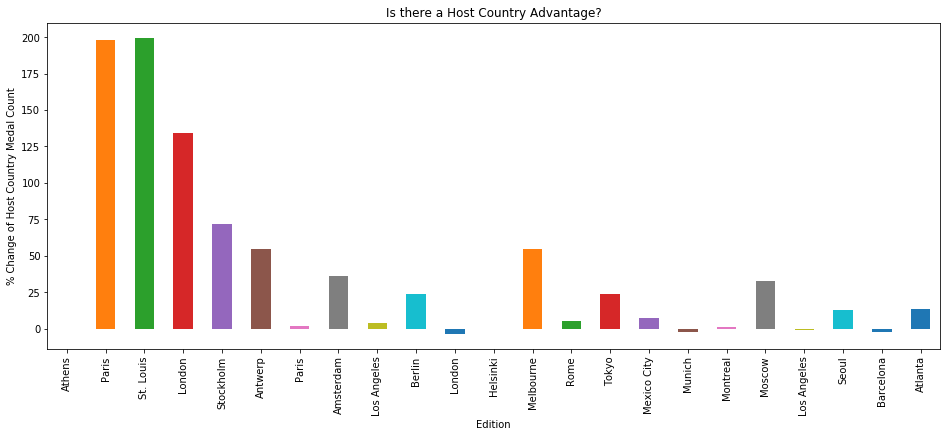

In [91]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence["Change"]

# Make bar plot of change: ax
ax = change.plot(kind="bar", figsize=(16, 6))

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show();

Fantastic work! What do you think - is there a host country advantage?



**ANSWER**: Yes - Host countries show a huge percentage change in the count of medals won compared to those who are not hosting the Olympics.